In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
dataset = pd.read_csv('german_credit_data.csv')

In [30]:
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [32]:
dataset.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


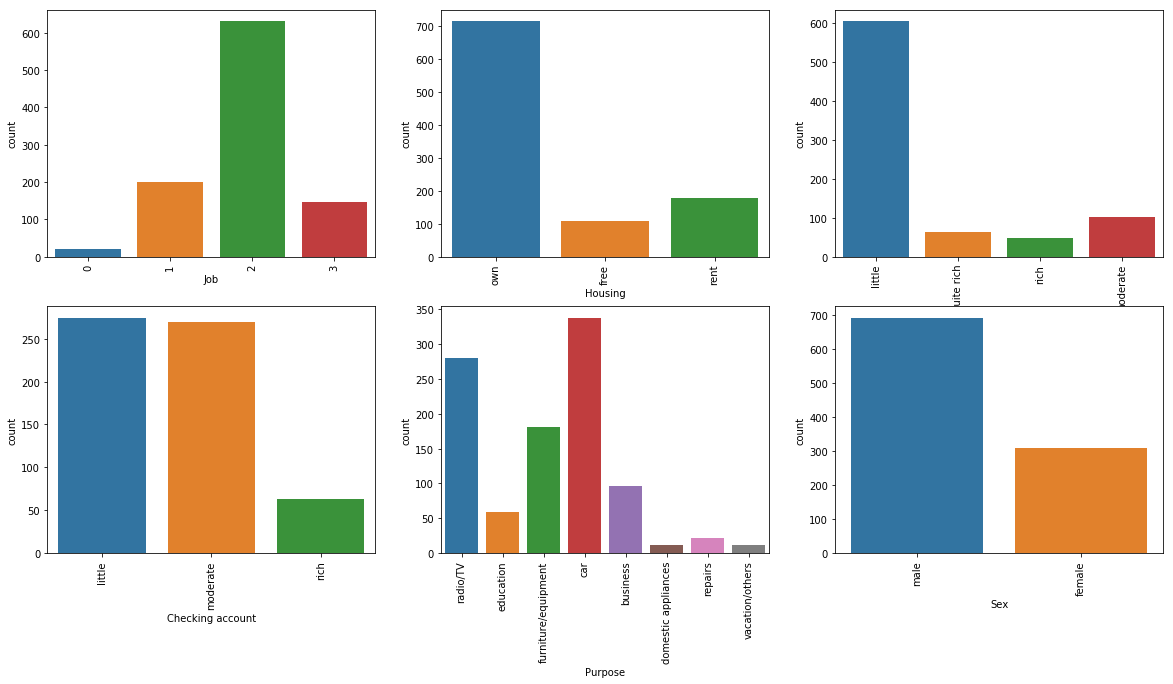

In [33]:
labels= ['Job','Housing','Saving accounts','Checking account','Purpose','Sex' ]
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for attr, subplot in zip(labels, ax.flatten()):
    sns.countplot(dataset[attr], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        dataset.nunique()

In [34]:
dataset['Saving accounts'] = dataset['Saving accounts'].fillna('null_val')
dataset['Checking account'] = dataset['Checking account'].fillna('null_val')

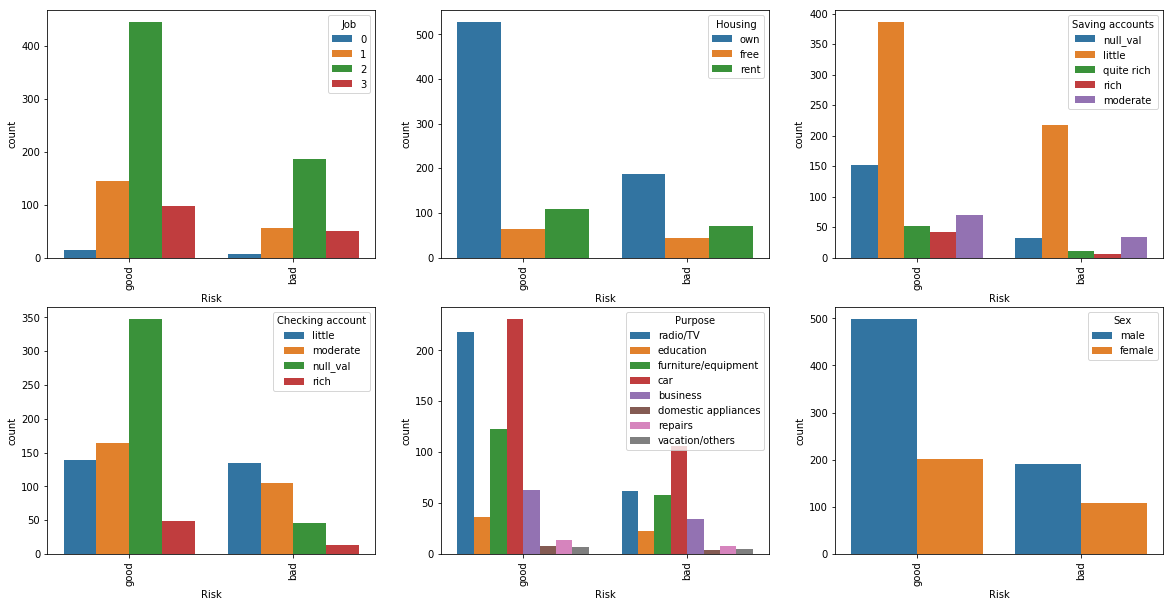

In [35]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for attr, subplot in zip(labels, ax.flatten()):
    sns.countplot('Risk',hue=attr, data = dataset, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        dataset.nunique()

In [36]:
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,null_val,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,null_val,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [45]:
labels= ['Sex','Housing','Saving accounts','Checking account','Purpose','Job' ]
dataset_tf = dataset.loc[:,['Sex','Housing','Saving accounts','Checking account','Purpose','Job' ]]
from sklearn.preprocessing import OneHotEncoder
le = OneHotEncoder()
final_df = le.fit_transform(dataset_tf)
dataset_tf

<1000x26 sparse matrix of type '<class 'numpy.float64'>'
	with 6000 stored elements in Compressed Sparse Row format>

In [61]:
dataset['Job'] = dataset['Job'].astype(str)
final_df = pd.get_dummies(dataset)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
Age                            1000 non-null int64
Credit amount                  1000 non-null int64
Duration                       1000 non-null int64
Sex_female                     1000 non-null uint8
Sex_male                       1000 non-null uint8
Job_0                          1000 non-null uint8
Job_1                          1000 non-null uint8
Job_2                          1000 non-null uint8
Job_3                          1000 non-null uint8
Housing_free                   1000 non-null uint8
Housing_own                    1000 non-null uint8
Housing_rent                   1000 non-null uint8
Saving accounts_little         1000 non-null uint8
Saving accounts_moderate       1000 non-null uint8
Saving accounts_null_val       1000 non-null uint8
Saving accounts_quite rich     1000 non-null uint8
Saving accounts_rich           1000 non-null uint8
Checking account_little    

In [62]:
del(final_df['Job_0'])
del(final_df['Sex_female'])
del(final_df['Housing_free'])
del(final_df['Saving accounts_little'])
del(final_df['Checking account_little'])
del(final_df['Purpose_business'])
del(final_df['Risk_bad'])
final_df.head()

,Age,Credit amount,Duration,Sex_male,Job_1,Job_2,Job_3,Housing_own,Housing_rent,Saving accounts_moderate,...,Checking account_null_val,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,67,1169,6,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,22,5951,48,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,49,2096,12,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
3,45,7882,42,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,53,4870,24,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
Age                            1000 non-null int64
Credit amount                  1000 non-null int64
Duration                       1000 non-null int64
Sex_male                       1000 non-null uint8
Job_1                          1000 non-null uint8
Job_2                          1000 non-null uint8
Job_3                          1000 non-null uint8
Housing_own                    1000 non-null uint8
Housing_rent                   1000 non-null uint8
Saving accounts_moderate       1000 non-null uint8
Saving accounts_null_val       1000 non-null uint8
Saving accounts_quite rich     1000 non-null uint8
Saving accounts_rich           1000 non-null uint8
Checking account_moderate      1000 non-null uint8
Checking account_null_val      1000 non-null uint8
Checking account_rich          1000 non-null uint8
Purpose_car                    1000 non-null uint8
Purpose_domestic appliances

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,:-1].values, final_df.iloc[:,-1].values, test_size = 0.2, random_state=9)

In [68]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 23)
(800,)
(200, 23)
(200,)


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [76]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Random Forest Accuracy: ',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Random Forest Accuracy:  0.71


/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[ 24,  25],
       [ 33, 118]])

In [78]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Logistic Regression Accuracy: ',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Logistic Regression Accuracy:  0.795


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 22,  27],
       [ 14, 137]])

In [79]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print('Decision Tree Classifier Accuracy: ',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Decision Tree Classifier Accuracy:  0.675


array([[ 20,  29],
       [ 36, 115]])

In [80]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Support Vector Machine Accuracy: ',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Support Vector Machine Accuracy:  0.765


array([[ 14,  35],
       [ 12, 139]])